In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('final.csv', parse_dates=['Date'], index_col = 0)
df = df.fillna(0)
df.head()

/var/folders/ff/5z0rmxy95cl5lfnczb_gnj9w0000gn/T/ipykernel_3514/15436575.py:1: DtypeWarning: Columns (30,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('final.csv', parse_dates=['Date'], index_col = 0)


,Open,High,Low,Close,Adj Close,Volume,Symbol,Security,GICS Sector,GICS Sub-Industry,...,Information Technology,Communication Services,Consumer Staples,Utilities,Financials,Materials,Real Estate,Consumer Discretionary,Energy,YRS
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-30,160.929993,163.100006,158.610001,160.179993,150.921692,3056900,MMM,3M,Industrials,Industrial Conglomerates,...,0,0,0,0,0,0,0,0,0,44
2020-01-10,160.669998,161.899994,157.720001,158.789993,149.612045,1989100,MMM,3M,Industrials,Industrial Conglomerates,...,0,0,0,0,0,0,0,0,0,44
2020-02-10,156.470001,161.940002,156.250000,160.360001,151.091309,1768600,MMM,3M,Industrials,Industrial Conglomerates,...,0,0,0,0,0,0,0,0,0,44
2020-05-10,162.250000,163.500000,161.759995,162.750000,153.343170,1457000,MMM,3M,Industrials,Industrial Conglomerates,...,0,0,0,0,0,0,0,0,0,44
2020-06-10,163.440002,165.699997,161.830002,162.229996,152.853195,2021900,MMM,3M,Industrials,Industrial Conglomerates,...,0,0,0,0,0,0,0,0,0,44


In [4]:
mmm_df = df.loc[df['Symbol'] == 'MMM']
mmm_df

,Open,High,Low,Close,Adj Close,Volume,Symbol,Security,GICS Sector,GICS Sub-Industry,...,Information Technology,Communication Services,Consumer Staples,Utilities,Financials,Materials,Real Estate,Consumer Discretionary,Energy,YRS
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-30,160.929993,163.100006,158.610001,160.179993,150.921692,3056900,MMM,3M,Industrials,Industrial Conglomerates,...,0,0,0,0,0,0,0,0,0,44
2020-01-10,160.669998,161.899994,157.720001,158.789993,149.612045,1989100,MMM,3M,Industrials,Industrial Conglomerates,...,0,0,0,0,0,0,0,0,0,44
2020-02-10,156.470001,161.940002,156.250000,160.360001,151.091309,1768600,MMM,3M,Industrials,Industrial Conglomerates,...,0,0,0,0,0,0,0,0,0,44
2020-05-10,162.250000,163.500000,161.759995,162.750000,153.343170,1457000,MMM,3M,Industrials,Industrial Conglomerates,...,0,0,0,0,0,0,0,0,0,44
2020-06-10,163.440002,165.699997,161.830002,162.229996,152.853195,2021900,MMM,3M,Industrials,Industrial Conglomerates,...,0,0,0,0,0,0,0,0,0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,131.529999,134.550003,131.240005,134.330002,134.330002,3659300,MMM,3M,Industrials,Industrial Conglomerates,...,0,0,0,0,0,0,0,0,0,45
2022-06-27,134.410004,134.669998,132.289993,132.800003,132.800003,2388600,MMM,3M,Industrials,Industrial Conglomerates,...,0,0,0,0,0,0,0,0,0,45
2022-06-28,133.860001,134.570007,130.149994,130.330002,130.330002,2408300,MMM,3M,Industrials,Industrial Conglomerates,...,0,0,0,0,0,0,0,0,0,45


In [5]:
m_df = mmm_df.copy()
m_df = m_df.drop(columns=m_df.select_dtypes(include='object').columns)
m_df

,Open,High,Low,Close,Adj Close,Volume,News - All News Volume,News - Volume,News - Positive Sentiment,News - Negative Sentiment,...,Health Care,Information Technology,Communication Services,Consumer Staples,Utilities,Financials,Materials,Real Estate,Consumer Discretionary,Energy
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-30,160.929993,163.100006,158.610001,160.179993,150.921692,3056900,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2020-01-10,160.669998,161.899994,157.720001,158.789993,149.612045,1989100,589369.0,47.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2020-02-10,156.470001,161.940002,156.250000,160.360001,151.091309,1768600,506082.0,43.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2020-05-10,162.250000,163.500000,161.759995,162.750000,153.343170,1457000,489872.0,50.0,2.0,3.0,...,0,0,0,0,0,0,0,0,0,0
2020-06-10,163.440002,165.699997,161.830002,162.229996,152.853195,2021900,550713.0,50.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-24,131.529999,134.550003,131.240005,134.330002,134.330002,3659300,533627.0,45.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2022-06-27,134.410004,134.669998,132.289993,132.800003,132.800003,2388600,433341.0,54.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2022-06-28,133.860001,134.570007,130.149994,130.330002,130.330002,2408300,559643.0,34.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Also going to try dropping the industry classification
m_df = m_df.drop(labels=['Industrials','Health Care', 'Information Technology', 'Communication Services', 'Consumer Staples', 
                         'Utilities', 'Financials', 'Materials', 'Real Estate', 'Consumer Discretionary', 'Energy'], axis = 1)
m_df = m_df.drop(m_df.index[:7])


In [7]:
m_df.head()

,Open,High,Low,Close,Adj Close,Volume,News - All News Volume,News - Volume,News - Positive Sentiment,News - Negative Sentiment,...,D-6 Low,D-6 Close,D-6 Adj Close,D-6 Volume,D-7 Open,D-7 High,D-7 Low,D-7 Close,D-7 Adj Close,D-7 Volume
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-10,168.880005,170.479996,167.949997,169.300003,159.514557,2015500,527671.0,36.0,0.0,2.0,...,157.720001,158.789993,149.612045,1989100.0,160.929993,163.100006,158.610001,160.179993,150.921692,3056900.0
2020-12-10,169.470001,170.610001,168.119995,168.649994,158.902130,1533600,452574.0,11.0,0.0,0.0,...,156.250000,160.360001,151.091309,1768600.0,160.669998,161.899994,157.720001,158.789993,149.612045,1989100.0
2020-10-13,168.300003,169.449997,166.000000,166.630005,156.998886,1575300,544121.0,25.0,0.0,0.0,...,161.759995,162.750000,153.343170,1457000.0,156.470001,161.940002,156.250000,160.360001,151.091309,1768600.0
2020-10-14,167.009995,169.539993,166.789993,168.399994,158.666595,1435300,577765.0,44.0,1.0,0.0,...,161.830002,162.229996,152.853195,2021900.0,162.250000,163.500000,161.759995,162.750000,153.343170,1457000.0
2020-10-15,166.050003,169.679993,165.800003,169.080002,159.307297,1638100,580934.0,34.0,0.0,0.0,...,164.410004,166.490005,156.866989,2155400.0,163.440002,165.699997,161.830002,162.229996,152.853195,2021900.0


## Dimension Reduction using PCA

In [8]:
scaler = StandardScaler()
df_std = scaler.fit_transform(m_df)

In [9]:
pca = PCA(n_components=25)
data_pca = pca.fit_transform(df_std)

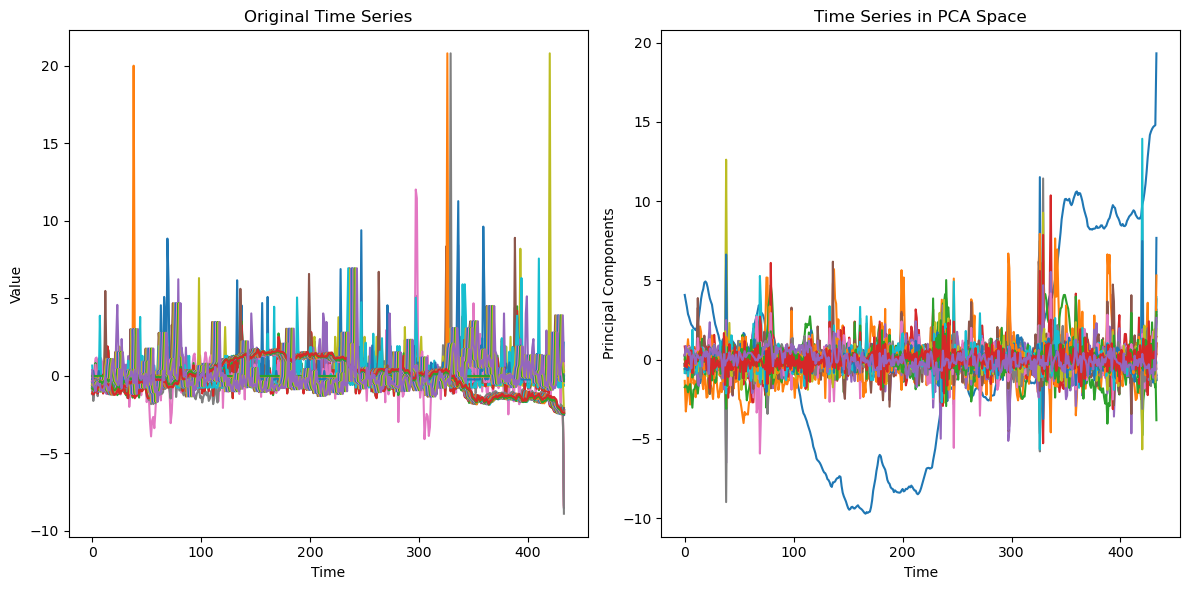

In [10]:
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
plt.plot(df_std)
plt.title('Original Time Series')
plt.xlabel('Time')
plt.ylabel('Value')

# Reduced data
plt.subplot(1, 2, 2)
plt.plot(data_pca)
plt.title('Time Series in PCA Space')
plt.xlabel('Time')
plt.ylabel('Principal Components')

plt.tight_layout()
plt.show()

In [11]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by component: {explained_variance}")
print(f"Total explained variance: {np.sum(explained_variance)}")

Explained variance by component: [0.62335634 0.05669264 0.03448421 0.02380497 0.01991227 0.01861165
 0.0175171  0.0173386  0.01625618 0.01586848 0.01493333 0.01449323
 0.01320235 0.01315419 0.01190323 0.01140713 0.01002239 0.00987889
 0.0096105  0.00828675 0.00787217 0.00693638 0.00637251 0.00621112
 0.00402241]
Total explained variance: 0.9921490024215207


In [12]:
n_components = pca.n_components_
feature_names = list(m_df.columns)
for i in range(n_components):
    component = pca.components_[i]
    sorted_idx = np.argsort(np.abs(component))[::-1]

    print(f"Principal Component {i+1}:")
    for idx in sorted_idx:
        print(f" {feature_names[idx]}: {component[idx]:.4f}")
    print("-----")

Principal Component 1:
 D-4 Low: -0.1575
 D-3 Low: -0.1575
 D-4 Close: -0.1574
 D-3 High: -0.1573
 D-3 Open: -0.1573
 D-4 High: -0.1573
 D-3 Close: -0.1573
 D-5 Low: -0.1573
 D-4 Open: -0.1573
 D-5 Close: -0.1573
 D-2 Low: -0.1573
 D-2 Open: -0.1572
 D-2 High: -0.1572
 D-5 High: -0.1571
 D-2 Close: -0.1571
 D-5 Open: -0.1570
 D-6 Close: -0.1569
 D-6 Low: -0.1569
 D-6 High: -0.1567
 D-3 Adj Close: -0.1565
 D-6 Open: -0.1565
 D-2 Adj Close: -0.1565
 Open: -0.1564
 D-4 Adj Close: -0.1563
 D-7 Close: -0.1563
 Low: -0.1562
 High: -0.1562
 D-7 Low: -0.1562
 D-7 High: -0.1560
 D-5 Adj Close: -0.1559
 Close: -0.1559
 D-7 Open: -0.1557
 Adj Close: -0.1557
 D-6 Adj Close: -0.1552
 D-7 Adj Close: -0.1543
 D-1 Low: -0.1515
 D-1 Open: -0.1513
 D-1 Close: -0.1511
 D-1 High: -0.1511
 D-1 Adj Close: -0.1496
 D-6 Volume: 0.0588
 D-4 Volume: 0.0587
 D-7 Volume: 0.0585
 D-5 Volume: 0.0583
 D-3 Volume: 0.0574
 D-2 Volume: 0.0559
 Volume: 0.0534
 D-1 Volume: 0.0516
 News - Adverse Events: 0.0233
 News - Al

## Building the model using the most important features

In [17]:
pca.components_[0]

array([-0.156353  , -0.15619592, -0.15621792, -0.15587331, -0.15566666,
        0.05337901, -0.01790673, -0.01663045, -0.00044822,  0.00048626,
       -0.00812119,  0.00332268, -0.00503221, -0.00257205,  0.01164234,
       -0.00018098,  0.00315199,  0.00256618,  0.01176895,  0.02332063,
        0.01107185,  0.00022349, -0.        , -0.15129016, -0.15105357,
       -0.15154643, -0.15111083, -0.14964143,  0.0515659 , -0.15720381,
       -0.15716084, -0.15725461, -0.15705048, -0.15647605,  0.05589218,
       -0.15733458, -0.15734869, -0.15746391, -0.15730801, -0.15649318,
        0.05741432, -0.15729522, -0.15732233, -0.15748991, -0.15735046,
       -0.15628501,  0.05871223, -0.1570034 , -0.15714243, -0.15730378,
       -0.1572606 , -0.15592677,  0.05825073, -0.15649184, -0.15669646,
       -0.15686288, -0.15688126, -0.15523827,  0.0587923 , -0.1556798 ,
       -0.15602654, -0.15615035, -0.15628321, -0.15432667,  0.05851809])

In [18]:
np.cov(m_df)

array([[4.81584436e+11, 4.17762693e+11, 4.01068136e+11, ...,
        7.98140564e+11, 8.37059920e+11, 5.93050378e+11],
       [4.17762693e+11, 3.83598164e+11, 3.67715472e+11, ...,
        7.05378542e+11, 7.01374616e+11, 5.20080264e+11],
       [4.01068136e+11, 3.67715472e+11, 3.64333618e+11, ...,
        6.80753630e+11, 6.65149618e+11, 5.19966409e+11],
       ...,
       [7.98140564e+11, 7.05378542e+11, 6.80753630e+11, ...,
        1.64363701e+12, 1.37880128e+12, 1.04320772e+12],
       [8.37059920e+11, 7.01374616e+11, 6.65149618e+11, ...,
        1.37880128e+12, 1.56311593e+12, 1.05243361e+12],
       [5.93050378e+11, 5.20080264e+11, 5.19966409e+11, ...,
        1.04320772e+12, 1.05243361e+12, 8.86430274e+11]])

In [25]:
import seaborn as sns
new_df = m_df.drop(labels=['Open', 'High', 'Low', 'Close'], axis=1)
new_df = scaler.fit_transform(new_df)
new_df = pd.DataFrame(new_df)
new_df.cov()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,1.002309,-0.353398,0.099790,0.102048,0.005912,0.000370,0.042534,-0.036947,0.022483,0.008934,...,0.967048,0.968145,0.965394,-0.324643,0.960439,0.962970,0.962990,0.964554,0.959866,-0.320283
1,-0.353398,1.002309,0.041529,0.116400,0.003849,0.068246,-0.011939,-0.002048,0.237605,0.230137,...,-0.300880,-0.302733,-0.291195,0.186969,-0.286823,-0.290970,-0.290569,-0.292873,-0.280148,0.133892
2,0.099790,0.041529,1.002309,0.275685,0.070280,0.102183,-0.022028,0.022452,0.203396,0.209793,...,0.124724,0.128013,0.135063,-0.014346,0.127270,0.132430,0.122522,0.124838,0.132674,0.091712
3,0.102048,0.116400,0.275685,1.002309,0.167580,0.285423,0.106901,-0.017063,0.516149,0.575511,...,0.116636,0.113535,0.160322,-0.069139,0.117215,0.115906,0.120212,0.115453,0.162807,-0.060314
4,0.005912,0.003849,0.070280,0.167580,1.002309,0.045296,0.087534,-0.026173,-0.000403,-0.007658,...,0.007685,0.009956,0.021641,0.031434,0.014622,0.010080,0.009958,0.008530,0.019970,0.054088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.962970,-0.290970,0.132430,0.115906,0.010080,0.006335,0.053553,-0.017326,0.056899,0.035158,...,0.994915,0.992930,0.984609,-0.330906,1.000220,1.002309,0.999688,0.999552,0.989810,-0.338619
57,0.962990,-0.290569,0.122522,0.120212,0.009958,0.004869,0.054168,-0.012747,0.061522,0.039333,...,0.996061,0.993487,0.986117,-0.344590,0.999531,0.999688,1.002309,1.000142,0.991330,-0.373493
58,0.964554,-0.292873,0.124838,0.115453,0.008530,0.008419,0.053074,-0.014838,0.058869,0.037575,...,0.997486,0.995049,0.987276,-0.338149,0.996611,0.999552,1.000142,1.002309,0.993156,-0.359551
59,0.959866,-0.280148,0.132674,0.162807,0.019970,0.024172,0.043320,-0.027242,0.089685,0.068975,...,0.986997,0.983943,0.994204,-0.328402,0.987676,0.989810,0.991330,0.993156,1.002309,-0.351424
